In [1]:
# imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

## Data Description and Analysis

In [2]:
data = pd.read_excel('Real estate valuation data set.xlsx', index_col=0)

In [3]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [5]:
feature_names = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

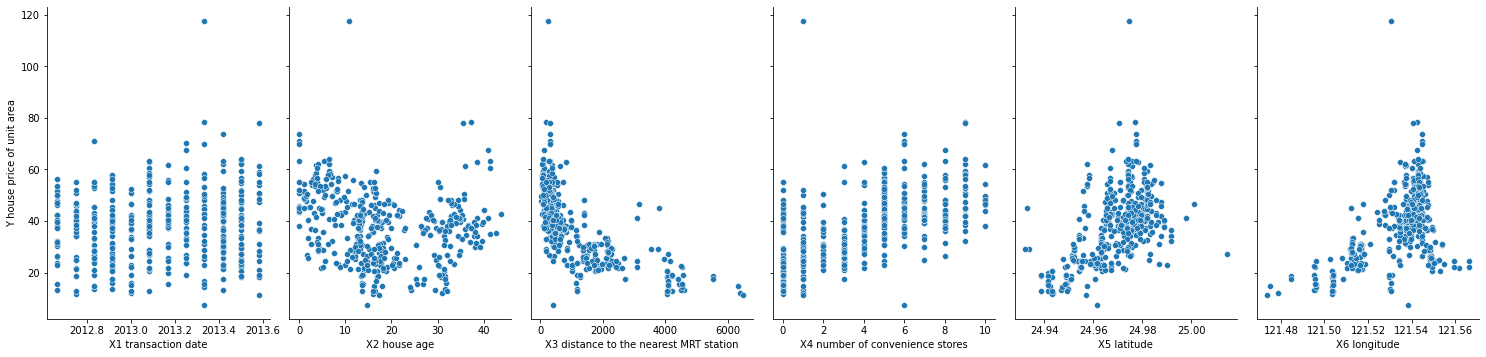

In [6]:
# Visual analysis of each variable with respect to price
sns.pairplot(data, x_vars=feature_names, y_vars='Y house price of unit area', height=5, aspect=0.7)

In [7]:
X = data[feature_names]
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024
2,2012.916667,19.5,306.59470,9,24.98034,121.53951
3,2013.583333,13.3,561.98450,5,24.98746,121.54391
4,2013.500000,13.3,561.98450,5,24.98746,121.54391
5,2012.833333,5.0,390.56840,5,24.97937,121.54245


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(414, 6)


So there are 414 features and 6 variables.

In [9]:
for col in X:
    print(X[col].isnull)

<bound method Series.isnull of No
1      2012.916667
2      2012.916667
3      2013.583333
4      2013.500000
5      2012.833333
          ...     
410    2013.000000
411    2012.666667
412    2013.250000
413    2013.000000
414    2013.500000
Name: X1 transaction date, Length: 414, dtype: float64>
<bound method Series.isnull of No
1      32.0
2      19.5
3      13.3
4      13.3
5       5.0
       ... 
410    13.7
411     5.6
412    18.8
413     8.1
414     6.5
Name: X2 house age, Length: 414, dtype: float64>
<bound method Series.isnull of No
1        84.87882
2       306.59470
3       561.98450
4       561.98450
5       390.56840
          ...    
410    4082.01500
411      90.45606
412     390.96960
413     104.81010
414      90.45606
Name: X3 distance to the nearest MRT station, Length: 414, dtype: float64>
<bound method Series.isnull of No
1      10
2       9
3       5
4       5
5       5
       ..
410     0
411     9
412     7
413     5
414     9
Name: X4 number of convenience stor

No null values.

In [10]:
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [11]:
print(y.isnull)

<bound method Series.isnull of No
1      37.9
2      42.2
3      47.3
4      54.8
5      43.1
       ... 
410    15.4
411    50.0
412    40.6
413    52.5
414    63.9
Name: Y house price of unit area, Length: 414, dtype: float64>


There are 414 y values, so one for each feature.

In [12]:
# Splitting X and y into training and testing sets for MLR
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# 75% for training and 25% for testing

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


## Dimensionality Reduction Test

In [47]:
# PCA
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [48]:
# PCA
from sklearn.decomposition import PCA

# Instantiate
pca = PCA(n_components=0.95)

# Fit and Apply dimensionality reduction on X
Z = pca.fit_transform(X_std)
print(Z)

[[-2.13509745 -0.67641339  1.44659308  0.67674973 -0.8845824 ]
 [-1.75310593  0.17614703  0.72787491  0.73538755 -0.79948262]
 [-1.36220524 -0.85054791 -1.46312606  0.46733449  0.65146221]
 ...
 [-1.34751756 -0.4425823  -0.21953395  0.35934399 -0.2681339 ]
 [-0.75248479  1.07484553 -0.1635905  -0.25698696 -0.22597846]
 [-1.7034896  -0.18362983 -1.58613466  0.14067301 -1.01913925]]


In [49]:
# Show number of dimensions after PCA reduction
print(len(pca.components_))

5


In [59]:
# Get the memory size in bytes of one dimension
one_col = np.array(X.iloc[:, 0])
one_col.size * one_col.itemsize

3312

There are now 5 dimensions in the data. However, the performance benefit of dropping one dimension in this case is not significant: it would save a few seconds when training one of the models below, and it would only save about 4Kb of training data. Since a PCA reduction would complicate the interpretation of the models and their results, all 6 dimensions will be kept.

## Feature Selection Test

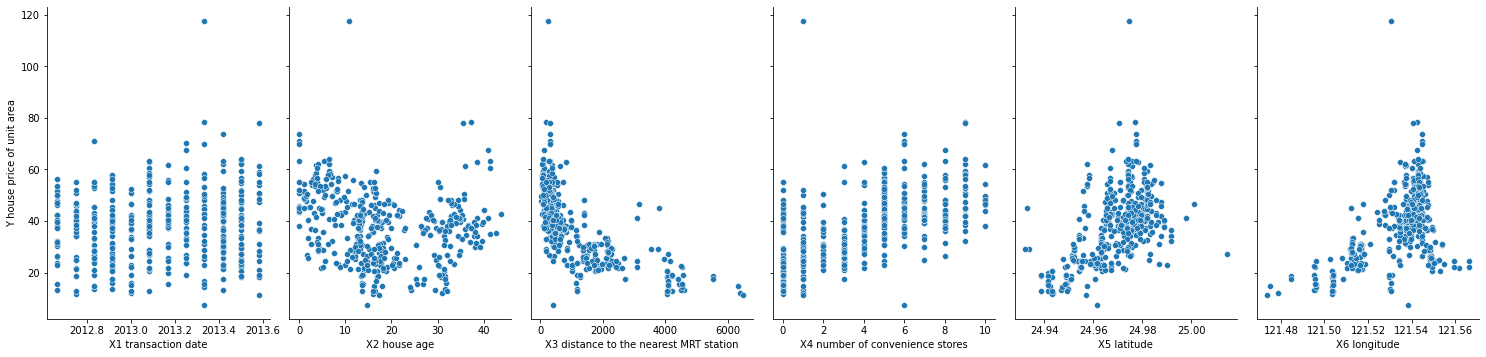

In [16]:
# Taking another look at our variables
sns.pairplot(data, x_vars=feature_names, y_vars='Y house price of unit area', height=5, aspect=0.7)

Transaction date does not seem to have a linear correlation with house price, so I will train an MLR model without it to see if it's more accurate.

In [17]:
feature_names_reduced = feature_names.copy()
feature_names_reduced.remove('X1 transaction date')
print(feature_names_reduced)

['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


In [18]:
Xr = X[feature_names_reduced]  # Xr: X reduced.
Xr.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,
1,32.0,84.87882,10,24.98298,121.54024
2,19.5,306.59470,9,24.98034,121.53951
3,13.3,561.98450,5,24.98746,121.54391
4,13.3,561.98450,5,24.98746,121.54391
5,5.0,390.56840,5,24.97937,121.54245


In [19]:
# Splitting Xr and y into training and testing sets
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, y, random_state=1)

# 75% for training and 25% for testing
print(Xr_train.shape)
print(yr_train.shape)
print(Xr_test.shape)
print(yr_test.shape)

(310, 5)
(310,)
(104, 5)
(104,)


In [20]:
# instantiate a linear regression model
linregr = LinearRegression()

# fit the model to the training data (learn the coefficients)
linregr.fit(Xr_train, yr_train)

# print the intercept and coefficients
print(linregr.intercept_)
print(linregr.coef_)

-433.7894152497134
[-2.39157343e-01 -4.73776424e-03  1.09332205e+00  2.24000967e+02
 -4.20969538e+01]


In [21]:
# pair the feature names with the coefficients
list(zip(feature_names_reduced, linregr.coef_))

[('X2 house age', -0.2391573433964929),
 ('X3 distance to the nearest MRT station', -0.004737764238792255),
 ('X4 number of convenience stores', 1.0933220468347353),
 ('X5 latitude', 224.00096702300596),
 ('X6 longitude', -42.096953825243766)]

In [22]:
# make predictions on the testing set
yr_pred = linregr.predict(Xr_test)
list(zip(yr_test, yr_pred))

[(27.3, 33.04584016796019),
 (54.4, 47.43223443917253),
 (22.0, 21.79224903441849),
 (11.6, 15.44307587003226),
 (45.4, 44.317406793424595),
 (23.0, 33.33731299064806),
 (21.8, 31.238459840363646),
 (32.2, 43.85207931781446),
 (37.4, 39.83838819731358),
 (22.6, 12.757462498026541),
 (17.4, 14.20588076550888),
 (36.8, 39.18657237809606),
 (23.1, 30.704562979475156),
 (36.9, 45.40851485674324),
 (56.3, 51.89069763419269),
 (20.9, 34.009650002190426),
 (43.5, 44.317406793424595),
 (40.3, 42.74947307376209),
 (27.7, 31.503326601983133),
 (42.1, 45.8924534119264),
 (46.6, 52.11597547817877),
 (21.8, 30.042469934629878),
 (38.1, 40.55411159536965),
 (53.7, 48.37374609266993),
 (57.1, 45.65064233685138),
 (26.6, 28.690551557088327),
 (32.1, 33.927308675938036),
 (56.8, 45.229722554719444),
 (43.1, 47.4671174376212),
 (16.7, 14.868072317813528),
 (33.4, 35.694514215019296),
 (34.2, 35.22884075566202),
 (39.6, 40.53636166400105),
 (52.5, 45.325385492078055),
 (47.1, 48.24016960516332),
 (13.0, 

In [23]:
print(metrics.mean_absolute_error(yr_test, yr_pred))

5.7130098605512405


This has a higher MAE than with all 6 features, so it's better to keep the transaction dates when training. No features will be eliminated.

## Prediction - MLR

In [24]:
# instantiate a linear regression model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-10941.170089271101
[ 5.13105639e+00 -2.38917872e-01 -4.89104343e-03  1.07095094e+00
  2.16892209e+02 -3.91724306e+01]


In [25]:
# pair the feature names with the coefficients
list(zip(feature_names, linreg.coef_))

[('X1 transaction date', 5.1310563902535336),
 ('X2 house age', -0.23891787209106435),
 ('X3 distance to the nearest MRT station', -0.004891043430633901),
 ('X4 number of convenience stores', 1.070950942996594),
 ('X5 latitude', 216.89220859325224),
 ('X6 longitude', -39.17243057683667)]

In [26]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
list(zip(y_test, y_pred))

[(27.3, 34.55262861205483),
 (54.4, 47.105983199129696),
 (22.0, 20.88527493404763),
 (11.6, 13.002688003794901),
 (45.4, 42.71291412291612),
 (23.0, 34.518074461497235),
 (21.8, 31.042959026086464),
 (32.2, 44.93118756252079),
 (37.4, 37.79597388739057),
 (22.6, 14.010360057862272),
 (17.4, 12.47356475394372),
 (36.8, 38.41819080388268),
 (23.1, 31.718316507929558),
 (36.9, 45.12134183962553),
 (56.3, 50.60429996458333),
 (20.9, 35.98896001374669),
 (43.5, 43.99567822047902),
 (40.3, 44.51400762139929),
 (27.7, 30.025165484605168),
 (42.1, 43.75865007382163),
 (46.6, 51.16898569556179),
 (21.8, 28.505502464802703),
 (38.1, 40.12664745917573),
 (53.7, 46.69584570189181),
 (57.1, 45.255879701235244),
 (26.6, 27.987500793689833),
 (32.1, 31.163952453120146),
 (56.8, 47.071196691809746),
 (43.1, 45.758670225064634),
 (16.7, 15.429838347767145),
 (33.4, 33.79857542986065),
 (34.2, 34.82852713267857),
 (39.6, 41.83579189683587),
 (52.5, 44.60123564551759),
 (47.1, 47.799304150121316),
 (13.

The predictions are fairly close.

In [27]:
# MSE
print(metrics.mean_squared_error(y_test, y_pred))

53.72994415125341


In [28]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

7.330071224159655


In [29]:
# calculate the MAE. This is the most interpretable one because it is the average error in y units.
print(metrics.mean_absolute_error(y_test, y_pred))

5.5725510992173435


On average, the prediction is off by 5.57 (in tens of thousands of New Taiwan Dollars per 3.3 square metres).

## Prediction - Polynomial Fitting

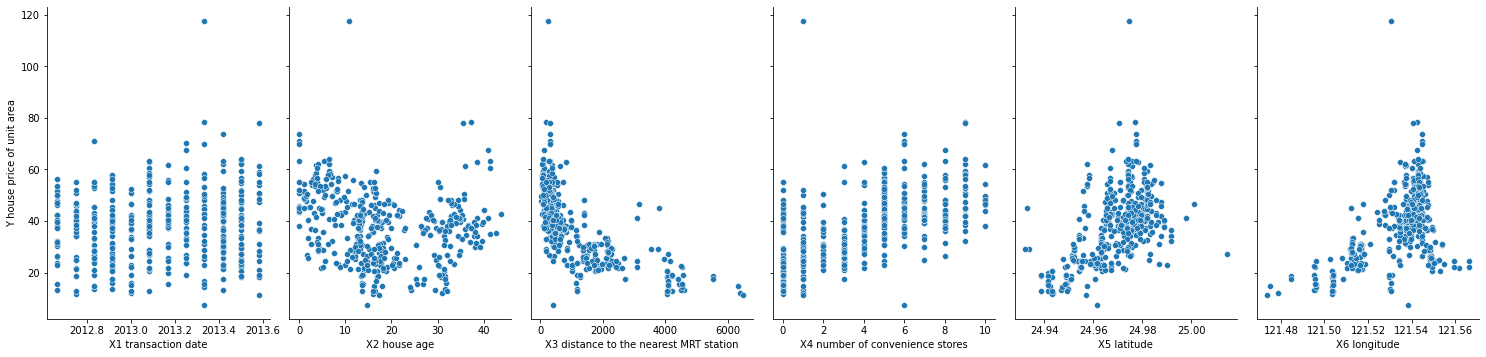

In [30]:
# Taking another look at our variables
sns.pairplot(data, x_vars=feature_names, y_vars='Y house price of unit area', height=5, aspect=0.7)

Some variables seem to have a curved shape so I will try polynomial fitting.

In [31]:
# Transforming the data using PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)
len(X_poly)

414

In [32]:
# Splitting data for training and testing
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.4, random_state=4)

In [33]:
# Fitting linear regression model to transformed data
linreg_poly = LinearRegression()
linreg_poly.fit(X_poly_train, y_poly_train)

LinearRegression()

In [34]:
# Prediction
y_poly_pred = linreg_poly.predict(X_poly_test)
print(metrics.mean_absolute_error(y_poly_test, y_poly_pred))

5.430007216325366


Better than the 5.57 from linear regression. Now, I will try different degrees and pick the best one.

In [35]:
# The data needs to be split into train-valid-test to test the model at the end.
X_trainvalid, X_finaltest, y_trainvalid, y_finaltest = train_test_split(X, y, test_size=0.2, random_state=4)

Text(0, 0.5, 'Mean Absolute Error')

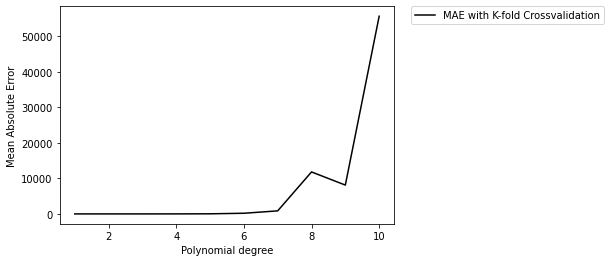

In [36]:
# Testing with degrees 1 to 10
d_range = list(range(1, 11))
d_cross_val = []
linregp = LinearRegression()

# Use cross-validation on each polynomial degree
for d in d_range:
    poly = PolynomialFeatures(degree=d)
    X_ = poly.fit_transform(X_trainvalid)
    d_cross_val.append(-1*cross_val_score(linregp, X_, y_trainvalid, cv=4, scoring='neg_mean_absolute_error').mean())

# Plot error w.r.t degree
plt.plot(d_range, d_cross_val,'k', label='MAE with K-fold Crossvalidation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Absolute Error')

In [37]:
# List errors for a closer look
d_cross_val

[5.932175312277122,
 5.243381157316582,
 6.332883927336414,
 13.046882609875455,
 36.662327504147505,
 191.1900881265409,
 864.8510509360784,
 11815.745157006937,
 8121.941781917301,
 55634.83361563954]

Degree 2 (d_cross_val[1]) has the lowest mean absolute error while having a low degree to prevent overfitting, so it will be selected for testing on the final 20% of data.

In [38]:
# Do final test with polynomial degree 2.
poly2 = PolynomialFeatures(degree=2)
X_trainvalid_poly = poly2.fit_transform(X_trainvalid)
linreg_deg2 = LinearRegression()
linreg_deg2.fit(X_trainvalid_poly, y_trainvalid)

X_finaltest_poly2 = poly2.fit_transform(X_finaltest)
y_finalpred_poly2 = linreg_deg2.predict(X_finaltest_poly2)

In [39]:
print(metrics.mean_absolute_error(y_finaltest, y_finalpred_poly2))

5.987586924415754


This is worse than the polynomial fitting done with degree 2 earlier (before testing out different degrees), which had a MAE of 5.43, and also worse than the multiple linear regression done which had a MAE of 5.71. However, these results are not statistically significant, so linear regression and polynomial regression (best at degree 2) perform approximately as well. Linear regression is simpler so that is the best model in this case.

## Prediction - Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
# Create Decision Tree model
dtr = DecisionTreeRegressor(random_state=0)

In [42]:
# Perform k-fold cross-validation and get MAE
-1*cross_val_score(dtr, X, y, cv=4, scoring='neg_mean_absolute_error').mean()

6.174001120238985

## Prediction - Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Create the Random Forest regressor
rfr = RandomForestRegressor(random_state=0)

In [45]:
# Perform k-fold cross-validation and get MAE
-1*cross_val_score(rfr, X, y, cv=4, scoring='neg_mean_absolute_error').mean()

4.868604656465601

In [46]:
# Fit the Random Forest model to all of the data to get the feature importances
rfr.fit(X, y)
# pair the feature names with the coefficients
list(zip(feature_names, rfr.feature_importances_))

[('X1 transaction date', 0.04107669989724715),
 ('X2 house age', 0.18633711327988953),
 ('X3 distance to the nearest MRT station', 0.5748198788212079),
 ('X4 number of convenience stores', 0.0224021949401898),
 ('X5 latitude', 0.09739407904615952),
 ('X6 longitude', 0.07797003401530611)]